In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) establish a seed, choose a random sample of 25 observations, calculate the sample's mean and maximum glucose readings, then compare the results using charts to the population statistics for the same variable.

In [4]:
# Establish a seed to ensure repeatability
np.random.seed(42)

# Choose 25 observations at random for your sample.
sample = data.sample(n=25)

In [5]:
# Determine the sample's mean and highest glucose readings.
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

In [7]:
# Determine the highest and population mean glucose readings.
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

In [8]:
# Show the figures
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


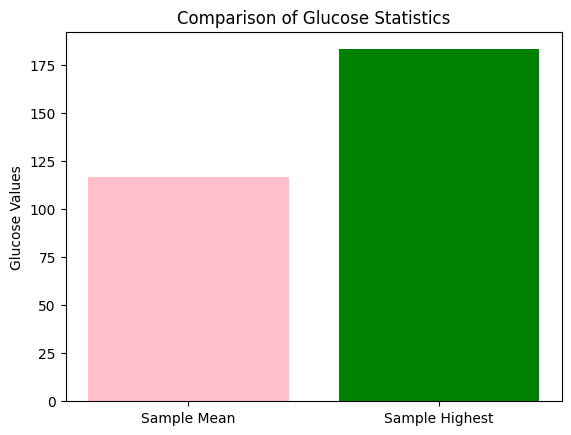

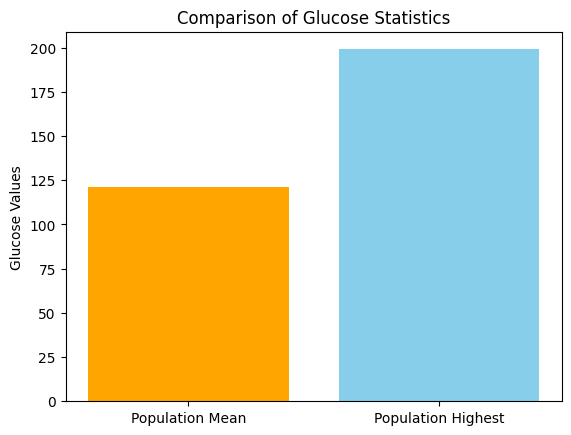

In [20]:
# Make a comparative bar chart.

labels = ['Sample Mean', 'Sample Highest']
values = [sample_mean_glucose, sample_highest_glucose]

plt.bar(labels, values, color=['pink', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

# Make a comparative bar chart.
labels_1= ['Population Mean', 'Population Highest']
values_1= [population_mean_glucose, population_highest_glucose]
plt.bar(labels_1, values_1, color=['orange', 'skyblue'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

b) Using charts, compared results of the samples' and the population's BMIs at the 98th percentile.


In [15]:
# Determine the sample's BMI's 98th percentile.
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Determine the population's 98th percentile for BMI.
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

In [16]:
# Display the percentiles
print("Sample 98th Percentile BMI:", sample_98th_percentile_bmi)
print("Population 98th Percentile BMI:", population_98th_percentile_bmi)

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


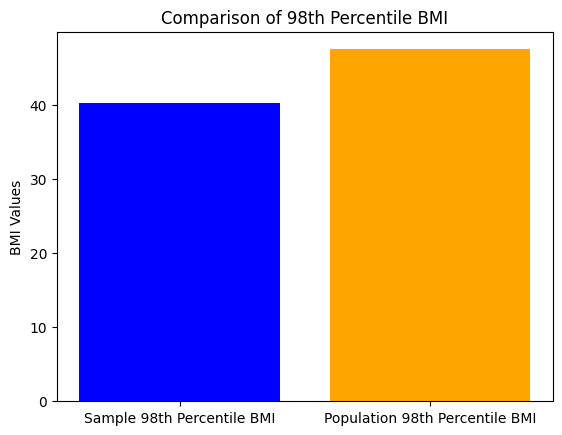

In [19]:
# Create a bar chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Values')
plt.show()

c) Create 500 samples (each with 150 observations) from the population using bootstrap (replace= True). Determine the average, mean, standard deviation, and percentile for blood pressure. Compare these with the population statistics for the same variable. Compare all of these using charts.



In [36]:
# The quantity and dimensions of each bootstrap sample

num_samples = 500
sample_size = 150

In [37]:
# Create empty arrays at first to hold bootstrap data.
bootstrap_means = np.zeros(num_samples)
bootstrap_std_devs = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [38]:
# Carry out bootstrap sampling

for i in range(num_samples):
   # Create a bootstrap sample by substituting
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=sample_size, replace=True)

   # Determine the bootstrap sample's mean, standard deviation, and 92th percentile.
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 92)

In [39]:
# Compute BloodPressure population statistics.
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_92_bp = np.percentile(data['BloodPressure'], 92)

In [42]:
# Show the demographic data
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 92th Percentile BloodPressure:", population_percentile_92_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 92th Percentile BloodPressure: 88.0


In [43]:
# Determine the bootstrap statistics' mean, standard deviation, and 92th percentile.
bootstrap_mean_mean = np.mean(bootstrap_means)
bootstrap_mean_std_dev = np.mean(bootstrap_std_devs)
bootstrap_mean_percentile_92 = np.mean(bootstrap_percentiles)

In [44]:
# Present the statistics from the bootstrap.
print("\nBootstrap Mean BloodPressure:", bootstrap_mean_mean)
print("Bootstrap Standard Deviation BloodPressure:", bootstrap_mean_std_dev)
print("Bootstrap 92th Percentile BloodPressure:", bootstrap_mean_percentile_92)


Bootstrap Mean BloodPressure: 69.0394
Bootstrap Standard Deviation BloodPressure: 19.18930574000917
Bootstrap 92th Percentile BloodPressure: 88.57800000000002


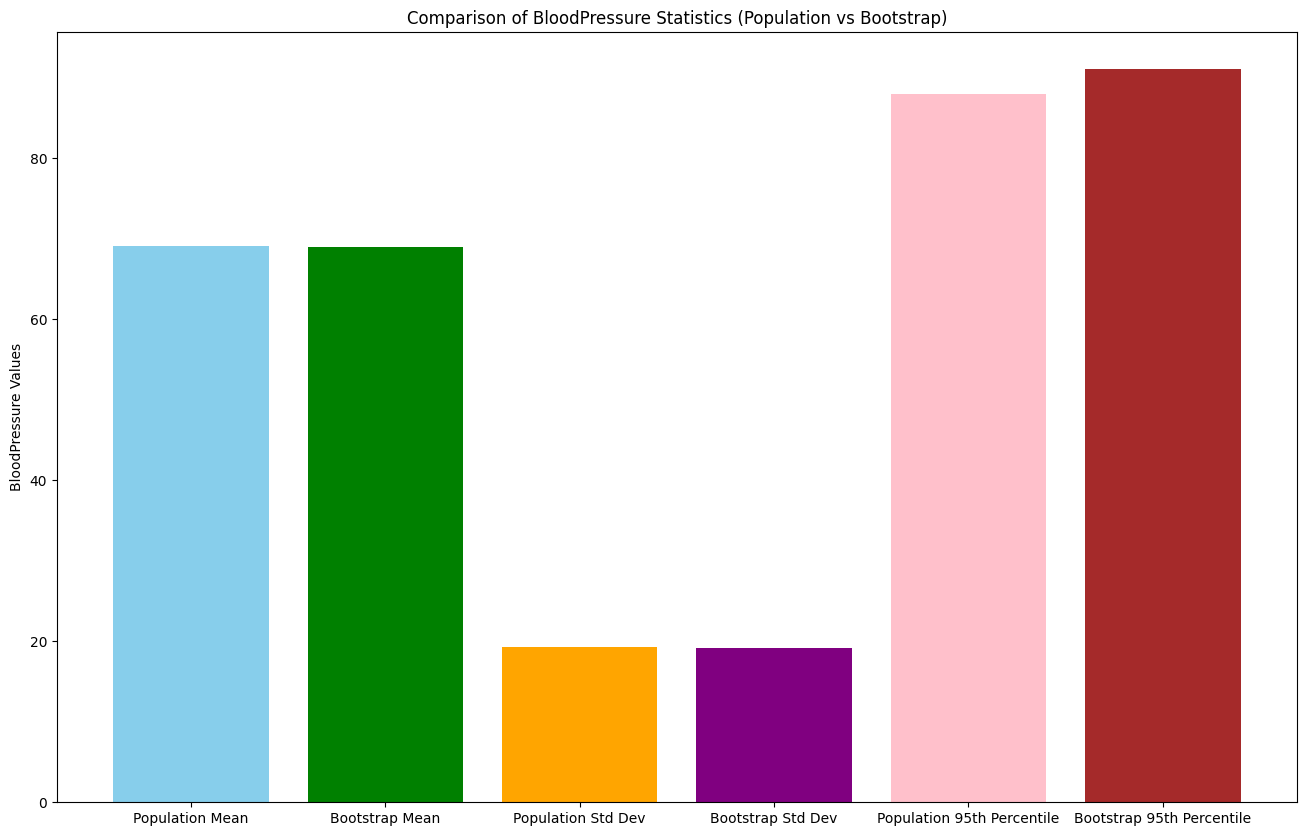

In [45]:
# Create a bar chart for comparison
plt.figure(figsize=(16, 10))
labels = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev', 'Population 95th Percentile', 'Bootstrap 95th Percentile']
values = [population_mean_bp, bootstrap_mean_mean, population_std_dev_bp, bootstrap_mean_std_dev, population_percentile_92_bp, bootstrap_mean_percentile_95]

plt.bar(labels, values, color=['skyblue', 'green', 'orange', 'purple', 'pink', 'brown'])
plt.title('Comparison of BloodPressure Statistics (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()